In [92]:
import numpy as np
import pandas as pd

X = pd.read_csv('ejemplo.csv', sep = ';')

Y = X['PE']

X = X.loc[:, ['AT', 'V', 'AP', 'RH']]

# Normalizacion ZSCORE

In [104]:
Xnorm = (X.values - np.mean(X.values, axis = 0))/np.std(X.values, axis = 0)

# Normalizacion MINMAX

In [99]:
Xnorm = (X.values - np.min(X.values, axis = 0))/(np.max(X.values, axis = 0) - np.min(X.values, axis = 0))
Xnorm

array([[0.18498584, 0.27419929, 0.44419698, 0.86394102],
       [0.6184136 , 0.58950178, 0.45805494, 0.65201072],
       [0.79121813, 0.56120996, 0.35288295, 0.2191689 ],
       ...,
       [0.40169972, 0.31992883, 0.52734472, 0.71179625],
       [0.44872521, 0.61405694, 0.63573373, 0.92613941],
       [0.61954674, 0.46156584, 0.46943826, 0.61233244]])

In [134]:
def Regresion(Z, labels, alpha = 0.1, niter = 100, lamda = 0.1):
    theta = np.random.random((Z.shape[1] + 1,1))
    m = len(labels)
    
    Z = np.hstack((np.ones((Z.shape[0],1)) , Z))
    
    for i in range(niter):
    
        h = np.dot(theta.T, Z.T)

        delta = (h - labels[None, :])

        J = 1/(2*m)*(delta @ delta.T)
        
        print(i, J)

        DJ = 1/(m)*delta @ Z

        theta = (1- alpha*lamda)theta - alpha * DJ.T
        
    return theta

SyntaxError: invalid syntax (<ipython-input-134-c8e8d927c5c1>, line 19)

In [135]:
otheta = Regresion(Xnorm, Y.values, alpha = 0.01, niter= 1000)

0 [[103255.15233555]]
1 [[101197.25300543]]
2 [[99180.47399308]]
3 [[97203.9888626]]
4 [[95266.98801678]]
5 [[93368.67834308]]
6 [[91508.28286757]]
7 [[89685.04041669]]
8 [[87898.20528641]]
9 [[86147.04691895]]
10 [[84430.84958654]]
11 [[82748.91208225]]
12 [[81100.54741764]]
13 [[79485.08252704]]
14 [[77901.8579784]]
15 [[76350.2276904]]
16 [[74829.5586558]]
17 [[73339.23067079]]
18 [[71878.63607026]]
19 [[70447.17946879]]
20 [[69044.27750727]]
21 [[67669.358605]]
22 [[66321.86271711]]
23 [[65001.24109722]]
24 [[63706.95606523]]
25 [[62438.48078001]]
26 [[61195.29901701]]
27 [[59976.90495063]]
28 [[58782.80294117]]
29 [[57612.50732638]]
30 [[56465.54221738]]
31 [[55341.44129892]]
32 [[54239.74763393]]
33 [[53160.01347208]]
34 [[52101.80006249]]
35 [[51064.67747034]]
36 [[50048.2243973]]
37 [[49052.02800582]]
38 [[48075.68374701]]
39 [[47118.79519218]]
40 [[46180.9738679]]
41 [[45261.83909447]]
42 [[44361.0178278]]
43 [[43478.14450456]]
44 [[42612.86089056]]
45 [[41764.81593224]]
46 [[

482 [[19.01350667]]
483 [[18.88134464]]
484 [[18.75172812]]
485 [[18.62460666]]
486 [[18.49993082]]
487 [[18.37765215]]
488 [[18.25772313]]
489 [[18.14009723]]
490 [[18.02472882]]
491 [[17.91157318]]
492 [[17.80058647]]
493 [[17.69172575]]
494 [[17.58494891]]
495 [[17.48021468]]
496 [[17.37748261]]
497 [[17.27671307]]
498 [[17.17786719]]
499 [[17.0809069]]
500 [[16.98579487]]
501 [[16.89249453]]
502 [[16.80097]]
503 [[16.71118616]]
504 [[16.62310856]]
505 [[16.53670343]]
506 [[16.45193769]]
507 [[16.36877891]]
508 [[16.28719531]]
509 [[16.20715572]]
510 [[16.12862962]]
511 [[16.05158707]]
512 [[15.97599875]]
513 [[15.9018359]]
514 [[15.82907035]]
515 [[15.75767447]]
516 [[15.6876212]]
517 [[15.61888401]]
518 [[15.55143689]]
519 [[15.48525435]]
520 [[15.42031142]]
521 [[15.3565836]]
522 [[15.29404691]]
523 [[15.23267781]]
524 [[15.17245326]]
525 [[15.11335067]]
526 [[15.05534788]]
527 [[14.99842319]]
528 [[14.94255532]]
529 [[14.88772342]]
530 [[14.83390706]]
531 [[14.7810862]]
532 [[14

995 [[11.1502089]]
996 [[11.14863227]]
997 [[11.14705896]]
998 [[11.14548896]]
999 [[11.14392227]]


In [128]:
m = len(Y)
prediccion = otheta.T @ np.hstack((np.ones((m,1)), Xnorm)).T
prediccion[:, :10]

array([[475.76956534, 445.98709415, 439.26688891, 455.86409002,
        470.73721601, 468.89758255, 442.55978128, 468.55610094,
        432.69463323, 481.20954266]])

In [124]:
import matplotlib.pyplot as plt

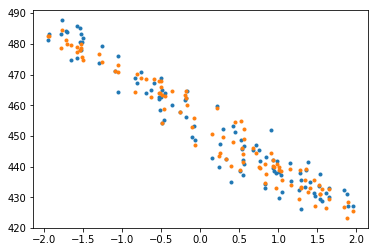

In [132]:
plt.plot(Xnorm[:100,0], Y[:100], '.')
plt.plot(Xnorm[:100,0][:,None], prediccion[:, :100].T, '.')

In [133]:
otheta

array([[454.34542614],
       [-11.7155652 ],
       [ -5.19147897],
       [  0.95195122],
       [ -1.31183987]])